# Assessment - Data Intelligence Analyst

# Load the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Flipkart_Mobiles.csv")
df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


# Data Cleaning

### 1. Memory Col

In [3]:
df['Memory'].unique()

array(['4 GB', '6 GB', '3 GB', '8 GB', '2 GB', '12 GB', '1 GB', '512 MB',
       '1.5 GB', '768 MB', '16 GB', '18 GB', '8 MB', '64 MB', '4 MB',
       '32 MB', '16 MB', '128 MB', nan, '4GB', '153 MB', '2 MB', '10 MB',
       '46 MB', '32 GB', '100 MB', '30 MB'], dtype=object)

#### Need to clean the memory column and make it standard

In [4]:
# Need to clean the memory column and get the float vals, so creating a new fn and a col for that
def convert_memory_to_gb(mem):
    if pd.isna(mem):
        return np.nan
    mem = mem.replace(" ", "").upper()  
    if "GB" in mem:
        return float(mem.replace("GB", ""))
    elif "MB" in mem:
        return round(float(mem.replace("MB", "")) / 1024, 2)
    else:
        return np.nan

In [5]:
# Creating new col and applying the fn
df['RAM_GB'] = df['Memory'].apply(convert_memory_to_gb)

In [6]:
df1 = df.copy()
df1

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,RAM_GB
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990,4.0
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990,4.0
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990,6.0
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990,6.0
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990,4.0
...,...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990,6.0
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449,6.0
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489,8.0
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989,8.0


### 2. Storage Col

In [7]:
df1['Storage'].unique()

array(['64 GB', '128 GB', '32 GB', '256 GB', '16 GB', '8 GB', '4 GB',
       '512 GB', nan, '16 MB', '128 MB', '2 MB', '4 MB', '48 MB', '8 MB',
       'Expandable Upto 32 GB', 'Expandable Upto 16 GB', '10 MB',
       '256 MB', '140 MB', '64 MB', '1 TB', '153 MB', '512 MB', '100 MB',
       '129 GB', '130 GB'], dtype=object)

In [8]:
df1[(df1['Storage']=='Expandable Upto 32 GB') | (df1['Storage']=='Expandable Upto 16 GB')]

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,RAM_GB
927,Nokia,3310 DS 2020,Black,16 MB,Expandable Upto 32 GB,3.8,3886,3886,0.02
933,Nokia,3310 DS 2020,Black,16 MB,Expandable Upto 32 GB,3.8,3999,3999,0.02
939,Nokia,3310 DS 2020,Black,16 MB,Expandable Upto 32 GB,3.8,3974,4179,0.02
972,Nokia,215,Black,8 MB,Expandable Upto 32 GB,4.1,2200,2200,0.01
976,Nokia,107 Dual SIM,Black,4 MB,Expandable Upto 16 GB,4.2,1900,1900,0.00
984,Nokia,3310 DS 2020,Black,16 MB,Expandable Upto 32 GB,3.8,3499,3499,0.02
989,Nokia,107 Dual SIM,Black,4 MB,Expandable Upto 16 GB,4.2,1860,1860,0.00
1023,Nokia,Asha 503,White,512 MB,Expandable Upto 32 GB,3.8,7399,7399,0.50
1025,Nokia,225,Black,8 MB,Expandable Upto 32 GB,4.0,3499,3499,0.01
1085,Nokia,222,Black,16 MB,Expandable Upto 32 GB,4.1,2860,2860,0.02


In [9]:
len(df1[(df1['Storage']=='Expandable Upto 32 GB') | (df1['Storage']=='Expandable Upto 16 GB')])

24

##### Rows with values 'Expandable Upto 32 GB' and 'Expandable Upto 16 GB' are just less than 1% of the dataset, so we can neglect or we can also make them standardized

In [10]:
def convert_storage_to_gb(sto):
    if pd.isna(sto):
        return np.nan
    sto = sto.upper().replace(" ", "")
    if "TB" in sto:
        return float(sto.replace("TB",""))*1024
    elif "GB" in sto:
        try:
            return float(sto.replace("GB",""))
        except:
            return np.nan
    elif "MB" in sto:
        return float(sto.replace("MB", ""))/1024
    else:
        return np.nan

In [11]:
df1['ROM_GB'] = df1['Storage'].apply(convert_storage_to_gb)
df1

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,RAM_GB,ROM_GB
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990,4.0,64.0
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990,4.0,64.0
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990,6.0,128.0
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990,6.0,128.0
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990,4.0,64.0
...,...,...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990,6.0,128.0
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449,6.0,128.0
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489,8.0,128.0
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989,8.0,128.0


### 3. Rating Col

In [12]:
df1['Rating'].isna().sum()

144

In [13]:
df1['Rating'] = df1['Rating'].fillna(df1['Rating'].mean())
df1

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,RAM_GB,ROM_GB
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990,4.0,64.0
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990,4.0,64.0
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990,6.0,128.0
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990,6.0,128.0
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990,4.0,64.0
...,...,...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990,6.0,128.0
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449,6.0,128.0
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489,8.0,128.0
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989,8.0,128.0


In [14]:
df2 = df1.copy()

# Feature Engineering

### Create a new column which shows the discount %

In [15]:
df2['Discount_Percentage'] = ((df2['Original Price']-df2['Selling Price']) / df2['Original Price']) *100
df2.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,RAM_GB,ROM_GB,Discount_Percentage
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990,4.0,64.0,25.015635
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990,4.0,64.0,25.015635
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990,6.0,128.0,22.234575
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990,6.0,128.0,22.234575
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990,4.0,64.0,25.015635


In [16]:
df2['Discount_Percentage'] = df2['Discount_Percentage'].round(2)
df2

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,RAM_GB,ROM_GB,Discount_Percentage
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990,4.0,64.0,25.02
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990,4.0,64.0,25.02
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990,6.0,128.0,22.23
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990,6.0,128.0,22.23
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990,4.0,64.0,25.02
...,...,...,...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990,6.0,128.0,0.00
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449,6.0,128.0,10.40
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489,8.0,128.0,13.50
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989,8.0,128.0,0.00


### Segmenting the Price

In [17]:
bins = [0, 10000, 15000, 25000, 40000, df2['Selling Price'].max()]
labels = ['Budget', 'Lower Midrange', 'Midrange', 'Upper Midrange', 'Premium']
df2['Price_Segment'] = pd.cut(df2['Selling Price'], bins=bins, labels=labels)
df2.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,RAM_GB,ROM_GB,Discount_Percentage,Price_Segment
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990,4.0,64.0,25.02,Lower Midrange
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990,4.0,64.0,25.02,Lower Midrange
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990,6.0,128.0,22.23,Lower Midrange
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990,6.0,128.0,22.23,Lower Midrange
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990,4.0,64.0,25.02,Lower Midrange


### Rating

In [18]:
df2['Rating'].unique()

array([4.5       , 4.3       , 4.4       , 4.2       , 4.24309764,
       4.        , 4.6       , 3.8       , 3.        , 4.1       ,
       3.7       , 3.1       , 4.7       , 3.9       , 3.4       ,
       3.3       , 3.6       , 3.5       , 3.2       , 2.7       ,
       2.8       , 5.        , 2.4       , 2.3       , 4.9       ,
       4.8       ])

In [19]:
df2['Low_Rated'] = df2['Rating']<3.0
df2.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,RAM_GB,ROM_GB,Discount_Percentage,Price_Segment,Low_Rated
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990,4.0,64.0,25.02,Lower Midrange,False
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990,4.0,64.0,25.02,Lower Midrange,False
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990,6.0,128.0,22.23,Lower Midrange,False
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990,6.0,128.0,22.23,Lower Midrange,False
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990,4.0,64.0,25.02,Lower Midrange,False


In [20]:
df2.drop(['Memory', 'Storage'], axis=1, inplace=True)

In [21]:
df2.head()

,Brand,Model,Color,Rating,Selling Price,Original Price,RAM_GB,ROM_GB,Discount_Percentage,Price_Segment,Low_Rated
0,OPPO,A53,Moonlight Black,4.5,11990,15990,4.0,64.0,25.02,Lower Midrange,False
1,OPPO,A53,Mint Cream,4.5,11990,15990,4.0,64.0,25.02,Lower Midrange,False
2,OPPO,A53,Moonlight Black,4.3,13990,17990,6.0,128.0,22.23,Lower Midrange,False
3,OPPO,A53,Mint Cream,4.3,13990,17990,6.0,128.0,22.23,Lower Midrange,False
4,OPPO,A53,Electric Black,4.5,11990,15990,4.0,64.0,25.02,Lower Midrange,False


# ASSESSMENT QUESTIONS AND ANSWERS

# EDA and Insights

## 1. What are the different price range segments for mobiles in India?

### Price Segment Distribution

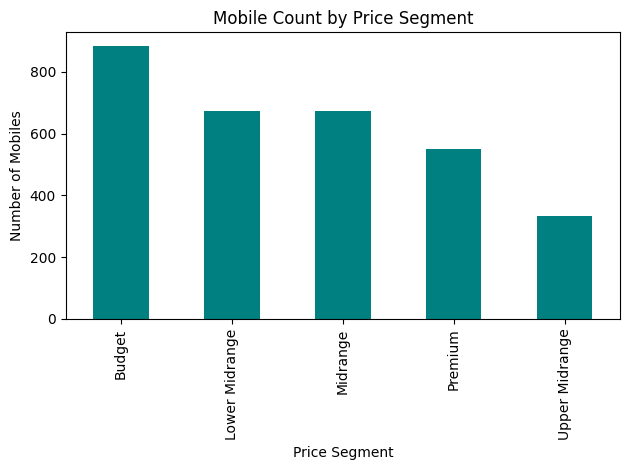

In [23]:
df2['Price_Segment'].value_counts().plot(kind='bar', color='teal', title='Mobile Count by Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Number of Mobiles')
plt.tight_layout()
plt.show()

### Most mobiles fall under the Budget segment followed by Lower Midrange and Midrange, showing strong demand in the Rs.0k – Rs.10k bracket.

## 2.	Which brand provides the most product offerings for the Indian Market?

### Top 10 Brands by Number of Mobiles

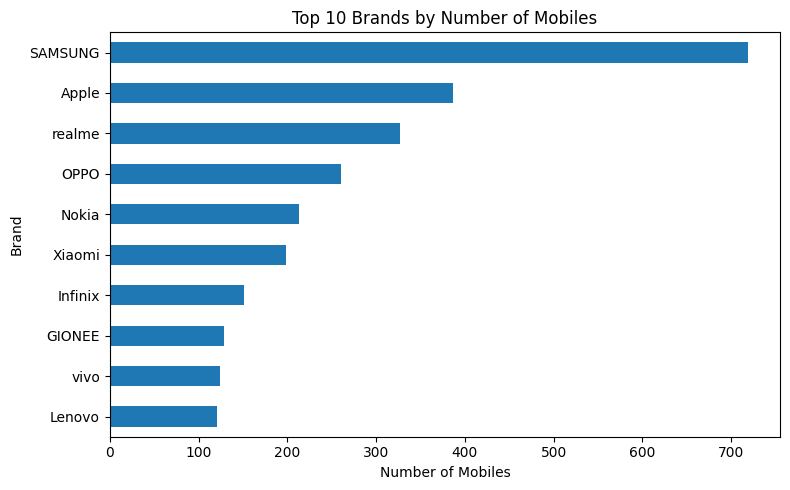

In [22]:
brand_counts = df2['Brand'].value_counts()
brand_counts.head(10).plot(kind='barh', figsize=(8,5), title='Top 10 Brands by Number of Mobiles')
plt.xlabel('Number of Mobiles')
plt.ylabel('Brand')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Samsung dominate the Indian market in terms of product availability followed by Apple and Realme.

## 3.	Which brand caters to all different segments? (low range, mid range, premium)

### Brand vs Segment

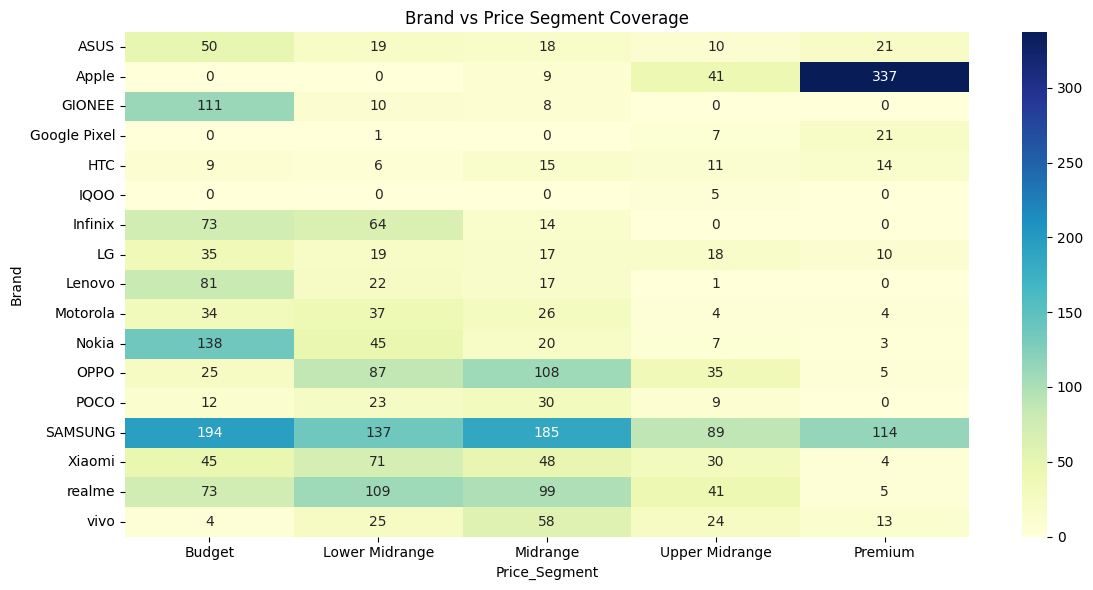

In [24]:
plt.figure(figsize=(12,6))
segment_dist = pd.crosstab(df2['Brand'], df2['Price_Segment'])
sns.heatmap(segment_dist, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Brand vs Price Segment Coverage')
plt.tight_layout()
plt.show()

### Samsung spread across all the price segment while apple mainly focuses on premium segment and dominate the segment as well

## 4.	What specifications are the most common that are offered by various brands?

### RAM and ROM Distribution

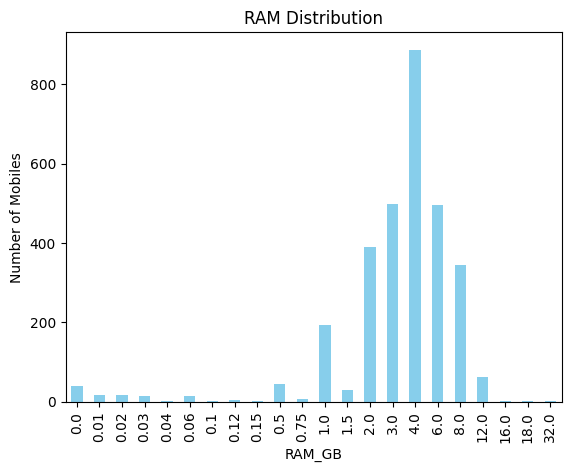

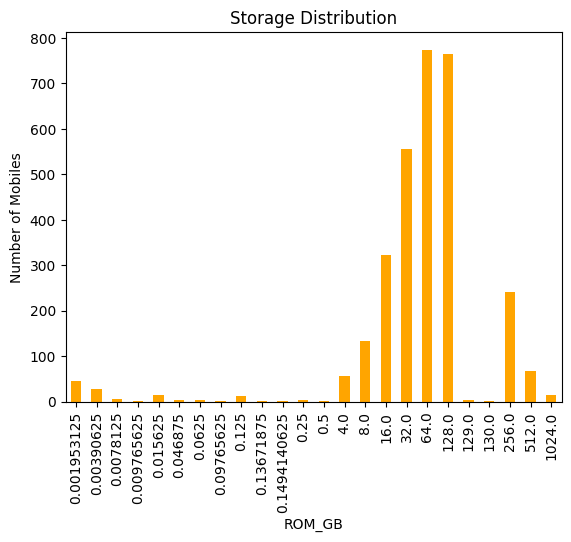

In [26]:
df2['RAM_GB'].value_counts().sort_index().plot(kind='bar', color='skyblue', title='RAM Distribution')
plt.ylabel('Number of Mobiles')
plt.show()

df2['ROM_GB'].value_counts().sort_index().plot(kind='bar', color='orange', title='Storage Distribution')
plt.ylabel('Number of Mobiles')
plt.show()

### 4GB RAM and 64GB/128GB Storage are the most common specs balancing performance and affordability.

## 5.	Provide more detailed insights based on the data provided.

### Avg Selling Price

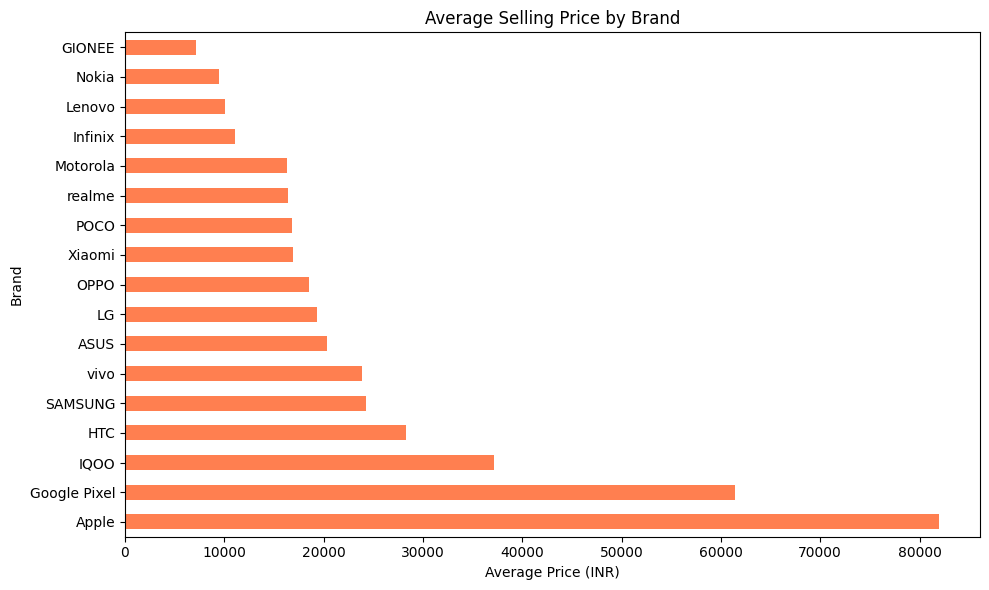

In [25]:
avg_price = df2.groupby('Brand')['Selling Price'].mean().sort_values(ascending=False)
avg_price.plot(kind='barh', figsize=(10,6), color='coral', title='Average Selling Price by Brand')
plt.xlabel('Average Price (INR)')
plt.tight_layout()
plt.show()

### Brands like Apple and Google command higher average prices, suggesting strong presence in premium categories.

### Discount vs Selling Price

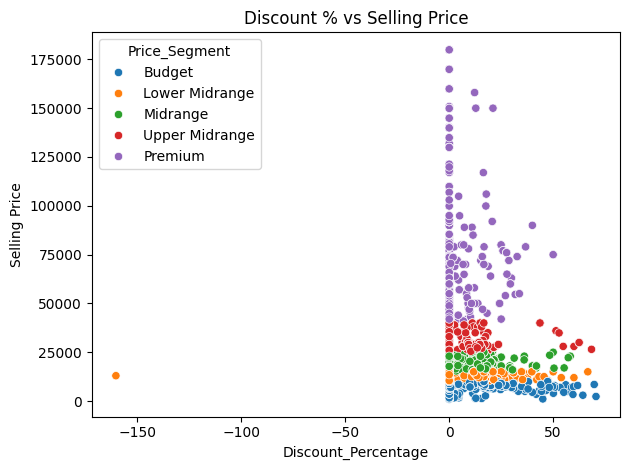

In [27]:
sns.scatterplot(data=df2, x='Discount_Percentage', y='Selling Price', hue='Price_Segment')
plt.title('Discount % vs Selling Price')
plt.tight_layout()
plt.show()

### Higher discounts are often seen in the budget and lower midrange segment possibly to drive volume sales or clear older inventory.

### Rating Distribution

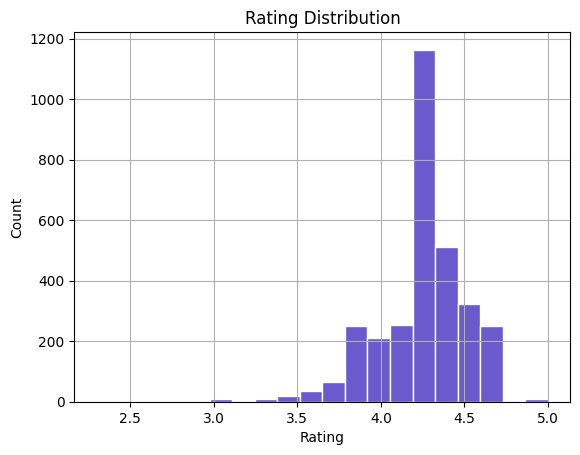

In [28]:
df2['Rating'].hist(bins=20, color='slateblue', edgecolor='white')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### Most phones are rated above 4.0, indicating general customer satisfaction.

### Low Rated

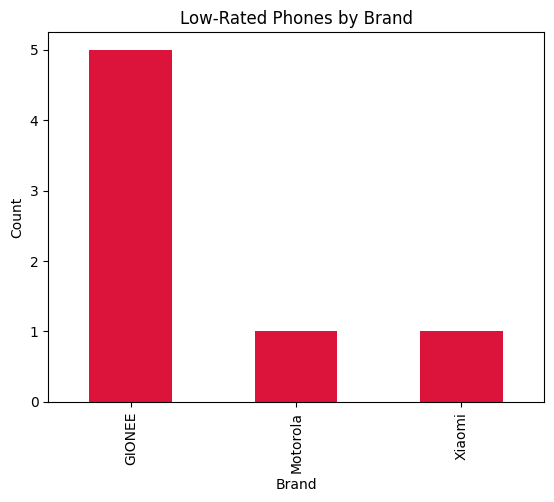

In [29]:
low_rated = df2[df2['Low_Rated'] == 1]
low_rated['Brand'].value_counts().plot(kind='bar', title='Low-Rated Phones by Brand', color='crimson')
plt.ylabel('Count')
plt.show()

### Gionee have a higher share of low-rated phones(5) suggesting potential quality or expectation mismatch.

In [31]:
df2.to_csv("Flipkart_Mobiles_Cleaned.csv", index=False)

In [32]:
df2

,Brand,Model,Color,Rating,Selling Price,Original Price,RAM_GB,ROM_GB,Discount_Percentage,Price_Segment,Low_Rated
0,OPPO,A53,Moonlight Black,4.5,11990,15990,4.0,64.0,25.02,Lower Midrange,False
1,OPPO,A53,Mint Cream,4.5,11990,15990,4.0,64.0,25.02,Lower Midrange,False
2,OPPO,A53,Moonlight Black,4.3,13990,17990,6.0,128.0,22.23,Lower Midrange,False
3,OPPO,A53,Mint Cream,4.3,13990,17990,6.0,128.0,22.23,Lower Midrange,False
4,OPPO,A53,Electric Black,4.5,11990,15990,4.0,64.0,25.02,Lower Midrange,False
...,...,...,...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,4.3,25990,25990,6.0,128.0,0.00,Upper Midrange,False
3110,SAMSUNG,M52 5G,Icy Blue,4.3,25489,28449,6.0,128.0,10.40,Upper Midrange,False
3111,SAMSUNG,M52 5G,Icy Blue,4.3,27239,31489,8.0,128.0,13.50,Upper Midrange,False
3112,SAMSUNG,M52 5G,Slate Black,4.2,22989,22989,8.0,128.0,0.00,Midrange,False


In [33]:
df2[df2['Discount_Percentage']<0]

,Brand,Model,Color,Rating,Selling Price,Original Price,RAM_GB,ROM_GB,Discount_Percentage,Price_Segment,Low_Rated
129,OPPO,A5s,Red,4.3,12990,4990,2.0,32.0,-160.32,Lower Midrange,False
